In [1]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
dt = pd.read_csv("data_tugas_akhir.csv",sep=',')
data = pd.DataFrame(dt)
X_Data = data[['Jenis_Kelamin','IPS1','IPS2','IPS3','IPS4','IPS5']]
Y_Target = data['Status']
data.head()

,No,Nim,Jenis_Kelamin,IPS1,IPS2,IPS3,IPS4,IPS5,IPK,Status
0,1,1010510001,L,2.55,2.52,2.87,2.93,2.99,3.02,TIDAK TEPAT WAKTU
1,2,1010510002,P,3.16,3.10,3.27,3.29,3.33,3.35,TEPAT WAKTU
2,3,1010510003,L,2.01,2.12,2.22,2.40,2.51,2.64,TIDAK TEPAT WAKTU
3,4,1010510006,L,1.62,1.70,1.86,2.01,2.14,2.41,TIDAK TEPAT WAKTU
4,5,1010510011,L,2.94,2.86,3.04,3.17,3.19,3.20,TIDAK TEPAT WAKTU


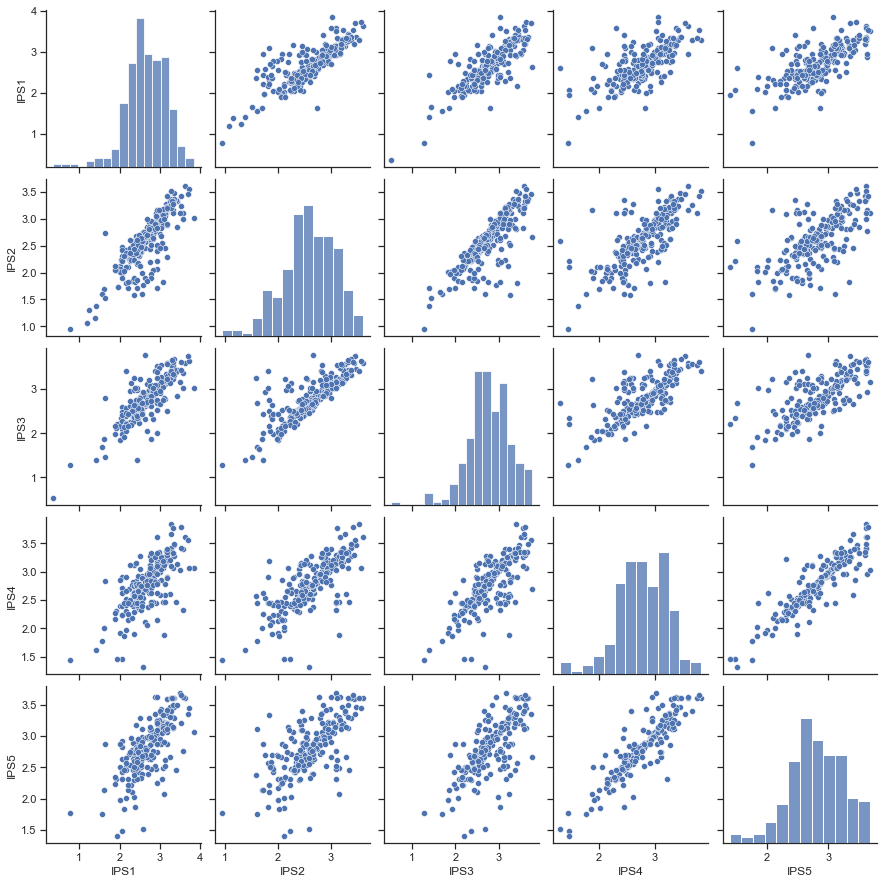

In [3]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data[['IPS1','IPS2','IPS3','IPS4','IPS5']])
plt.show()

# Melihat Informasi Data Statistik Data Kelulusan 

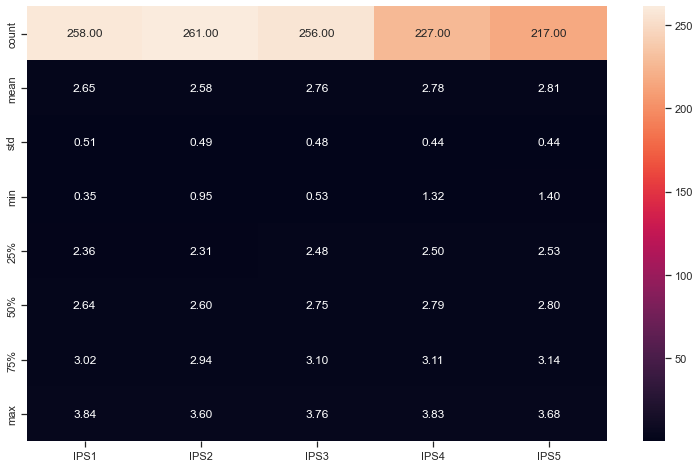

In [4]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(data[['IPS1','IPS2','IPS3','IPS4','IPS5']].describe(), annot=True, fmt=".2f")
plt.show()

# Korelasi Antar Atribut

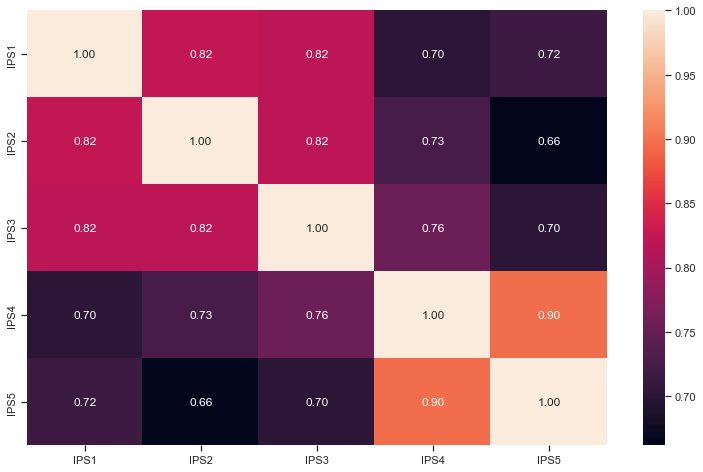

In [4]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(data[['IPS1','IPS2','IPS3','IPS4','IPS5']].corr(), annot=True, fmt=".2f")
plt.show()

# Melihat Type Data Masing-Masing Atribut

In [6]:
data.dtypes

No                 int64
Nim                int64
Jenis_Kelamin     object
IPS1             float64
IPS2             float64
IPS3             float64
IPS4             float64
IPS5             float64
IPK              float64
Status            object
dtype: object

# Melihat Informasi Data

In [7]:
X_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jenis_Kelamin  302 non-null    object 
 1   IPS1           258 non-null    float64
 2   IPS2           261 non-null    float64
 3   IPS3           256 non-null    float64
 4   IPS4           227 non-null    float64
 5   IPS5           217 non-null    float64
dtypes: float64(5), object(1)
memory usage: 13.0+ KB


# Melihat Distribusi Lulus Tepat Waktu dan Tidak

In [5]:
print(data.Status.value_counts())

TIDAK TEPAT WAKTU    224
TEPAT WAKTU           78
Name: Status, dtype: int64


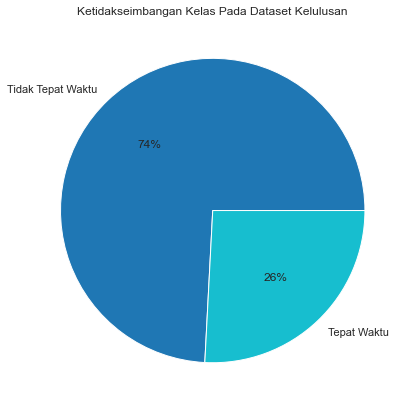

In [9]:
colors = ['tab:blue', 'tab:cyan']
label=['Tidak Tepat Waktu','Tepat Waktu']

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(data.Status.value_counts(), labels=label, colors = colors, autopct='%.0f%%')
ax.set_title('Ketidakseimbangan Kelas Pada Dataset Kelulusan')
plt.show()

# #Mengecek Adanya Missing Values

In [6]:
data.isnull().sum()

No                0
Nim               0
Jenis_Kelamin     0
IPS1             44
IPS2             41
IPS3             46
IPS4             75
IPS5             85
IPK              89
Status            0
dtype: int64

# Jumlah Baris yang terdapat Missing Value

In [11]:
data.shape[0] - data.dropna().shape[0]

96

# # Konversi tipe data nominal ke tipe numerik pada atribut Jenis Kelamin<br>
1. L = 0,
2. P = 1

In [12]:
X_Data = data[['Jenis_Kelamin','IPS1','IPS2','IPS3','IPS4','IPS5']]
Y_Target = data['Status']
X_Data.shape

(302, 6)

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_jk = LabelEncoder()
X_Data['Jenis_Kelamin'] = labelencoder_jk.fit_transform(X_Data['Jenis_Kelamin']).astype("int64")
X_Data.head()

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Jenis_Kelamin,IPS1,IPS2,IPS3,IPS4,IPS5
0,0,2.55,2.52,2.87,2.93,2.99
1,1,3.16,3.10,3.27,3.29,3.33
2,0,2.01,2.12,2.22,2.40,2.51
3,0,1.62,1.70,1.86,2.01,2.14
4,0,2.94,2.86,3.04,3.17,3.19


In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
X_Data=imputer.fit_transform(X_Data.iloc[:,0:6])
X_Data = pd.DataFrame(X_Data, columns=['Jenis_Kelamin','IPS1','IPS2','IPS3','IPS4','IPS5'])
X_Data.tail()
#X_Data.dtypes

,Jenis_Kelamin,IPS1,IPS2,IPS3,IPS4,IPS5
297,0.0,2.78,1.90,2.44,2.41,2.47
298,0.0,2.94,1.71,2.00,2.63,2.87
299,0.0,2.56,2.00,2.44,2.39,2.68
300,0.0,2.69,1.85,2.06,2.06,2.50
301,1.0,2.22,1.83,2.16,2.44,2.21


In [15]:
X_Data.isna().sum()

Jenis_Kelamin    0
IPS1             0
IPS2             0
IPS3             0
IPS4             0
IPS5             0
dtype: int64

# # Melakukan Penyeimbangan Data Dengan K-MEANS-SMOTE

In [16]:
import numpy as np
from kmeans_smote import KMeansSMOTE
X_Data = X_Data[['Jenis_Kelamin','IPS1','IPS2','IPS3','IPS4','IPS5']]
Y_Target = data['Status']

X, Y= X_Data,Y_Target
Y = Y.values

[print('Class {} has {} instances'.format(label, count))
 for label, count in zip(*np.unique(Y, return_counts=True))]

kmeans_smote = KMeansSMOTE(
    kmeans_args={
        'n_clusters': 5
    },
    smote_args={
        'k_neighbors': 5
    }
)
X_resampled, y_resampled = kmeans_smote.fit_sample(X,Y)

[print('Class {} has {} instances after oversampling'.format(label, count))
 for label, count in zip(*np.unique(y_resampled, return_counts=True))]

print(np.unique(y_resampled, return_counts=True))

Class TEPAT WAKTU has 78 instances
Class TIDAK TEPAT WAKTU has 224 instances
Class TEPAT WAKTU has 224 instances after oversampling
Class TIDAK TEPAT WAKTU has 224 instances after oversampling
(array(['TEPAT WAKTU', 'TIDAK TEPAT WAKTU'], dtype=object), array([224, 224]))


c:\python37\lib\site-packages\kmeans_smote.py:322: UserWarning: No minority clusters found for class TEPAT WAKTU. Performing regular SMOTE. Try changing the number of clusters.
  warnings.warn('No minority clusters found for class {}. Performing regular SMOTE. Try changing the number of clusters.'.format(minority_class_label))


# Pembagian Data Training 80% dan Testing 20% Menggunakan Data Spliting

In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [22]:
print("Data yang sudah Imbang")
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
print(x_train)

Data yang sudah Imbang
     Jenis_Kelamin      IPS1      IPS2      IPS3      IPS4      IPS5
49             0.0  2.560000  2.640000  2.520000  2.510000  2.390000
52             0.0  3.050000  2.960000  3.050000  3.142000  3.176000
74             1.0  3.130000  3.050000  3.140000  3.034000  2.868000
26             0.0  3.630000  3.600000  3.580000  3.600000  3.610000
45             1.0  2.430000  2.370000  2.410000  2.510000  2.580000
..             ...       ...       ...       ...       ...       ...
323            0.0  2.289328  2.522395  2.541387  2.518025  2.438235
192            0.0  2.460000  2.510000  2.550000  2.660000  2.644000
117            0.0  2.480000  2.600000  2.610000  2.740000  2.720000
47             1.0  2.600000  2.570000  2.710000  2.780000  2.820000
172            0.0  2.420000  2.580000  2.590000  2.780000  2.780000

[358 rows x 6 columns]


# Melakukan Tuning parameter pada Metode SVM

In [32]:
print("Tuning Parameter metode SVM pada Data Seimbang")
kernel_ds = ['linear','sigmoid','rbf','poly']
ker_ds = []
acc_ds = []

for i in kernel_ds:
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn import metrics
    
    
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=0)

  svm_ds = SVC(
      kernel = i,
      C = 1,
      gamma = 0.5
  )

  svm_ds.fit(X_train, y_train)
  y_pred = svm_ds.predict(X_test)
  score = metrics.accuracy_score(y_test,y_pred)
  
  ker_ds.append(i)
  acc_ds.append(score)

  #print("Nilai Akurasi kernel",i," = ", score) 

dict = {
    'kernel' : ker_ds,
    'akurasi': acc_ds
}

ds = pd.DataFrame(dict)
ds.sort_values(by=['akurasi'], ascending=False)

Tuning Parameter metode SVM pada Data Seimbang


,kernel,akurasi
3,poly,0.777778
0,linear,0.766667
2,rbf,0.766667
1,sigmoid,0.455556


In [33]:
model = SVC(C=1,gamma=0.5,kernel ='linear')
model.fit(x_train, y_train)

SVC(C=1, gamma=0.5, kernel='linear')

In [34]:
y_pred_ds = model.predict(x_test)


# Uji Performa Metode SVM Menggunakan Confusion Matriks

 Data Yang Seimbang
True Positive 34
True Negative 35
False Positive 6
False Negative 15
Akurasi SVM =  76.67
Sensitivitas atau Recall SVM = 69.39
Spesifisitas SVM =  85.37


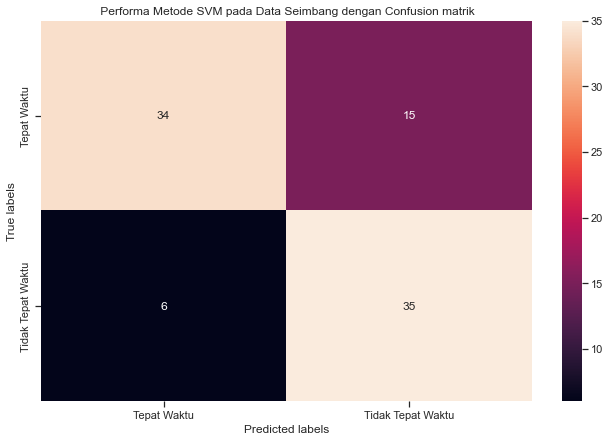

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix

cm_ds = confusion_matrix(y_test, y_pred_ds)
fig, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(cm_ds, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title(' Performa Metode SVM pada Data Seimbang dengan Confusion matrik'); 
ax.xaxis.set_ticklabels(['Tepat Waktu', 'Tidak Tepat Waktu']); ax.yaxis.set_ticklabels([ 'Tepat Waktu','Tidak Tepat Waktu']);

print(" Data Yang Seimbang")
TP = cm_ds[0, 0]
TN = cm_ds[1, 1]
FP = cm_ds[1, 0]
FN = cm_ds[0, 1]
print('True Positive',TP)
print('True Negative',TN)
print('False Positive',FP)
print('False Negative',FN)

akurasi = round((TP+TN) / float(TP+FN +TN+FP),4)*100
print("Akurasi SVM = ",akurasi)

sensitivity = round(TP / float(FN + TP),4)*100
print("Sensitivitas atau Recall SVM =",sensitivity)

specificity = round(TN / float(TN + FP),4)*100
print("Spesifisitas SVM = ",specificity)

# Perbandingan Kinerja metode SVM

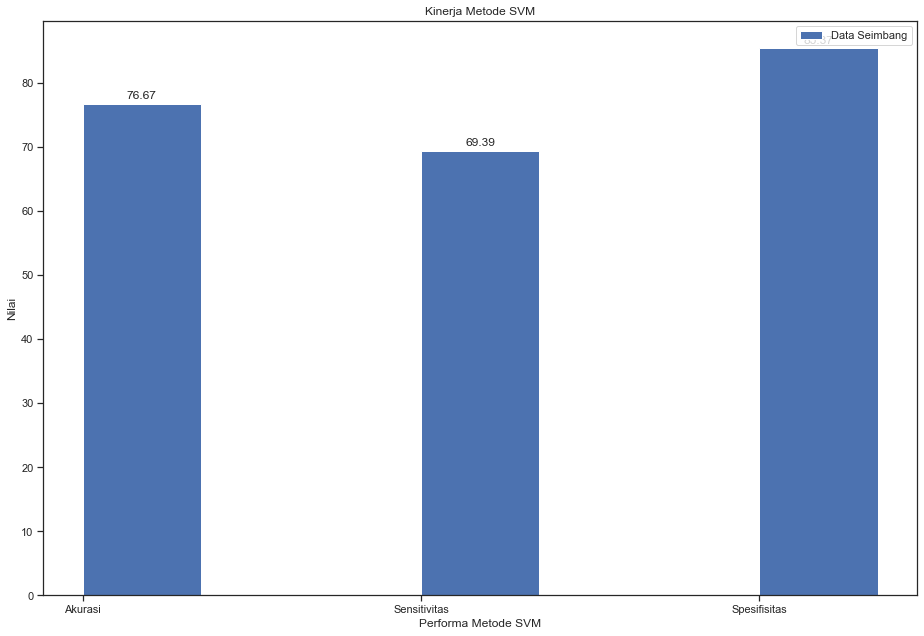

In [36]:
import matplotlib.pyplot as plt

# data to plot

labels = ['Akurasi', 'Sensitivitas', 'Spesifisitas']
kinerja_ds = [akurasi, sensitivity, specificity]

# create plot
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(13, 9))
rects2 = ax.bar(x + width/2, kinerja_ds, width, label='Data Seimbang')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nilai')
ax.set_xlabel('Performa Metode SVM')
ax.set_title('Kinerja Metode SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects2)

fig.tight_layout()

plt.show()

# Validasi Hasil Kelas Aktual dengan Prediksi

In [37]:
df1 = pd.DataFrame({'Aktual':y_test,'Prediksi':y_pred_ds.flatten()})
df1.head()

,Aktual,Prediksi
0,TIDAK TEPAT WAKTU,TEPAT WAKTU
1,TIDAK TEPAT WAKTU,TIDAK TEPAT WAKTU
2,TEPAT WAKTU,TEPAT WAKTU
3,TEPAT WAKTU,TIDAK TEPAT WAKTU
4,TIDAK TEPAT WAKTU,TIDAK TEPAT WAKTU


# Testing Data Baru

In [38]:
X = [[0,3.5,3.5,3.5,3.5,3.4]]

# Hasil Prediksi Data Testing

In [39]:
y_prediksi = model.predict(X)
print(y_prediksi)

['TEPAT WAKTU']


# Simpan Model yang Telah Dibangun

In [40]:
import pickle
pickle.dump(model, open('model_svm.pkl', 'wb'))

In [41]:
pickled_model = pickle.load(open('model_svm.pkl', 'rb'))
pickled_model.predict(X)

array(['TEPAT WAKTU'], dtype=object)